In [43]:
# imports

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [1]:
# generalized colatz is:
# for n%A==0 divide by B
# for n%A!=0 multiply by C and add D

# the basic colatz in this case would have A = B = 2, C = 3, D = 1

In [ ]:
def recursiveColatz(n, A, B, C, D):
    # can't really have a base case, so have to detect loops in some way
    # obviously really inefficient
    if (n % A == 0):
        # multiple of A
        return recursiveColatz(n / B, A, B, C, D)
    else:
        return recursiveColatz(n * C + D, A, B, C, D)


In [11]:
def memoizedColatz(n, A, B, C, D, memo):
    if (n in memo):
        return memo
    elif (n % A == 0):
        # multiple of A
        memo[n] = n // B
        return memoizedColatz(n // B, A, B, C, D, memo)
    else:
        memo[n] = n * C + D
        return memoizedColatz(n * C + D, A, B, C, D, memo)

In [36]:
memo = memoizedColatz(1063827, 2, 2, 3, 1, {})
print(memo)
print(len(memo))

{1063827: 3191482, 3191482: 1595741, 1595741: 4787224, 4787224: 2393612, 2393612: 1196806, 1196806: 598403, 598403: 1795210, 1795210: 897605, 897605: 2692816, 2692816: 1346408, 1346408: 673204, 673204: 336602, 336602: 168301, 168301: 504904, 504904: 252452, 252452: 126226, 126226: 63113, 63113: 189340, 189340: 94670, 94670: 47335, 47335: 142006, 142006: 71003, 71003: 213010, 213010: 106505, 106505: 319516, 319516: 159758, 159758: 79879, 79879: 239638, 239638: 119819, 119819: 359458, 359458: 179729, 179729: 539188, 539188: 269594, 269594: 134797, 134797: 404392, 404392: 202196, 202196: 101098, 101098: 50549, 50549: 151648, 151648: 75824, 75824: 37912, 37912: 18956, 18956: 9478, 9478: 4739, 4739: 14218, 14218: 7109, 7109: 21328, 21328: 10664, 10664: 5332, 5332: 2666, 2666: 1333, 1333: 4000, 4000: 2000, 2000: 1000, 1000: 500, 500: 250, 250: 125, 125: 376, 376: 188, 188: 94, 94: 47, 47: 142, 142: 71, 71: 214, 214: 107, 107: 322, 322: 161, 161: 484, 484: 242, 242: 121, 121: 364, 364: 182, 1

In [65]:
def iterativeColatz(n, A, B, C, D):
    memo = {}
    while (not n in memo):
        if (n % A == 0):
            # multiple of A
            memo[n] = n // B
            # return memoizedColatz(n // B, A, B, C, D, memo)
            n = n // B
        else:
            memo[n] = n * C + D
            # return memoizedColatz(n * C + D, A, B, C, D, memo)
            n = n * C + D
    return memo

In [68]:
memo = iterativeColatz(1063827, 2, 2, 3, 1)
print(memo)
print(len(memo))
# print(memo[1])

{1063827: 3191482, 3191482: 1595741, 1595741: 4787224, 4787224: 2393612, 2393612: 1196806, 1196806: 598403, 598403: 1795210, 1795210: 897605, 897605: 2692816, 2692816: 1346408, 1346408: 673204, 673204: 336602, 336602: 168301, 168301: 504904, 504904: 252452, 252452: 126226, 126226: 63113, 63113: 189340, 189340: 94670, 94670: 47335, 47335: 142006, 142006: 71003, 71003: 213010, 213010: 106505, 106505: 319516, 319516: 159758, 159758: 79879, 79879: 239638, 239638: 119819, 119819: 359458, 359458: 179729, 179729: 539188, 539188: 269594, 269594: 134797, 134797: 404392, 404392: 202196, 202196: 101098, 101098: 50549, 50549: 151648, 151648: 75824, 75824: 37912, 37912: 18956, 18956: 9478, 9478: 4739, 4739: 14218, 14218: 7109, 7109: 21328, 21328: 10664, 10664: 5332, 5332: 2666, 2666: 1333, 1333: 4000, 4000: 2000, 2000: 1000, 1000: 500, 500: 250, 250: 125, 125: 376, 376: 188, 188: 94, 94: 47, 47: 142, 142: 71, 71: 214, 214: 107, 107: 322, 322: 161, 161: 484, 484: 242, 242: 121, 121: 364, 364: 182, 1

In [72]:
def ColatzForAllN(N, A, B, C, D):
    colatz = {}
    for n in range(1, N + 1):
        while (not n in colatz):
            if (n % A == 0):
                # multiple of A
                colatz[n] = n // B
                # return memoizedColatz(n // B, A, B, C, D, memo)
                n = n // B
            else:
                colatz[n] = n * C + D
                # return memoizedColatz(n * C + D, A, B, C, D, memo)
                n = n * C + D

    return colatz


In [12]:
N = 9
colatz = ColatzForAllN(N, 2, 2, 3, 1)
print(colatz)
print(len(colatz))
for n in range (1, 2*N):
    if (not n in colatz):
        print("n not in colatz is: ", str(n),)
colatzN = memoizedColatz(N, 2, 2, 3, 1, colatz)
print(colatzN)
print(len(colatzN))
for n in range (1, 2*N):
    if (not n in colatzN):
        print("n not in colatz is: ", str(n),)

{1: 4, 4: 2, 2: 1, 3: 10, 10: 5, 5: 16, 16: 8, 8: 4, 6: 3, 7: 22, 22: 11, 11: 34, 34: 17, 17: 52, 52: 26, 26: 13, 13: 40, 40: 20, 20: 10, 9: 28, 28: 14, 14: 7}
22
n not in colatz is:  12
n not in colatz is:  15
{1: 4, 4: 2, 2: 1, 3: 10, 10: 5, 5: 16, 16: 8, 8: 4, 6: 3, 7: 22, 22: 11, 11: 34, 34: 17, 17: 52, 52: 26, 26: 13, 13: 40, 40: 20, 20: 10, 9: 28, 28: 14, 14: 7}
22
n not in colatz is:  12
n not in colatz is:  15


In [38]:
def ColatzForEachN(N, A, B, C, D):
    ColatzM = {}
    for i in range(1, N + 1):
        n = i
        # print("Creating colatz for n =", n)
        colatz = {}
        while (not n in colatz):
            if (n % A == 0):
                # multiple of A
                colatz[n] = n // B
                # return memoizedColatz(n // B, A, B, C, D, memo)
                n = n // B
            else:
                colatz[n] = n * C + D
                # return memoizedColatz(n * C + D, A, B, C, D, memo)
                n = n * C + D
        ColatzM[i] = colatz
        # print("Colatz is:")
        # print(colatz)

    return ColatzM

In [39]:
N = 9
colatzM = ColatzForEachN(N, 2, 2, 3, 1)
# print(colatzM)
# print(len(colatzM))
for n in range (1, N+1):
    print("Printing colatz for n =", n)
    print(colatzM[n])
    print("n: ", str(len(colatzM[n])))

# for n in range (1, 2*N):
#     if (not n in colatz):
#         print("n not in colatz is: ", str(n),)

# colatzN = memoizedColatz(N, 2, 2, 3, 1, colatz)
# print(colatzN)
# print(len(colatzN))
# for n in range (1, 2*N):
#     if (not n in colatzN):
#         print("n not in colatz is: ", str(n),)

Printing colatz for n = 1
{1: 4, 4: 2, 2: 1}
n:  3
Printing colatz for n = 2
{2: 1, 1: 4, 4: 2}
n:  3
Printing colatz for n = 3
{3: 10, 10: 5, 5: 16, 16: 8, 8: 4, 4: 2, 2: 1, 1: 4}
n:  8
Printing colatz for n = 4
{4: 2, 2: 1, 1: 4}
n:  3
Printing colatz for n = 5
{5: 16, 16: 8, 8: 4, 4: 2, 2: 1, 1: 4}
n:  6
Printing colatz for n = 6
{6: 3, 3: 10, 10: 5, 5: 16, 16: 8, 8: 4, 4: 2, 2: 1, 1: 4}
n:  9
Printing colatz for n = 7
{7: 22, 22: 11, 11: 34, 34: 17, 17: 52, 52: 26, 26: 13, 13: 40, 40: 20, 20: 10, 10: 5, 5: 16, 16: 8, 8: 4, 4: 2, 2: 1, 1: 4}
n:  17
Printing colatz for n = 8
{8: 4, 4: 2, 2: 1, 1: 4}
n:  4
Printing colatz for n = 9
{9: 28, 28: 14, 14: 7, 7: 22, 22: 11, 11: 34, 34: 17, 17: 52, 52: 26, 26: 13, 13: 40, 40: 20, 20: 10, 10: 5, 5: 16, 16: 8, 8: 4, 4: 2, 2: 1, 1: 4}
n:  20


In [35]:
colatzM

{1: {1: 4, 4: 2, 2: 1},
 2: {2: 1, 1: 4, 4: 2},
 3: {3: 10, 10: 5, 5: 16, 16: 8, 8: 4, 4: 2, 2: 1, 1: 4},
 4: {4: 2, 2: 1, 1: 4},
 5: {5: 16, 16: 8, 8: 4, 4: 2, 2: 1, 1: 4},
 6: {6: 3, 3: 10, 10: 5, 5: 16, 16: 8, 8: 4, 4: 2, 2: 1, 1: 4},
 7: {7: 22,
  22: 11,
  11: 34,
  34: 17,
  17: 52,
  52: 26,
  26: 13,
  13: 40,
  40: 20,
  20: 10,
  10: 5,
  5: 16,
  16: 8,
  8: 4,
  4: 2,
  2: 1,
  1: 4},
 8: {8: 4, 4: 2, 2: 1, 1: 4},
 9: {9: 28,
  28: 14,
  14: 7,
  7: 22,
  22: 11,
  11: 34,
  34: 17,
  17: 52,
  52: 26,
  26: 13,
  13: 40,
  40: 20,
  20: 10,
  10: 5,
  5: 16,
  16: 8,
  8: 4,
  4: 2,
  2: 1,
  1: 4}}

In [114]:
def createGraphMatrix(colatzMatrix, graphName):
    G = nx.Graph()
    maxN = 0
    for n in colatzMatrix:
        maxN = n
        for i in colatzMatrix[n]:
            # print("n:", n, ", i:", i, ", colatzMatrix[n][i]: ", colatzMatrix[n][i])
            G.add_edges_from([(i, colatzMatrix[n][i])]) # Add edges

    pos = nx.spring_layout(G, k=0.5, iterations=5000)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=25000/len(G), edge_color='gray', font_size=2500/len(colatz))
    plt.title("ColatzGraph for all integers up to n = " + str(maxN))
    plt.savefig(graphName + ".png", dpi=600) # Saves the image
    plt.show() # Displays the plot

def createGraph(colatz, graphName):
    G = nx.Graph()
    firstNum = 0
    i = 1
    for n in colatz:
        if (i == 1):
            firstNum = n
            i = 0
        # print("n:", n, ", i:", i, ", colatzMatrix[n][i]: ", colatzMatrix[n][i])
        G.add_edges_from([(n, colatz[n])]) # Add edges

    pos = nx.spring_layout(G, k=0.5, iterations=5000)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=25000/len(colatz), edge_color='gray', font_size=2500/len(colatz))
    plt.title("Colatz Graph starting from n = " + str(firstNum))
    plt.savefig(graphName + ".png", dpi=600) # Saves the image
    plt.show() # Displays the plot

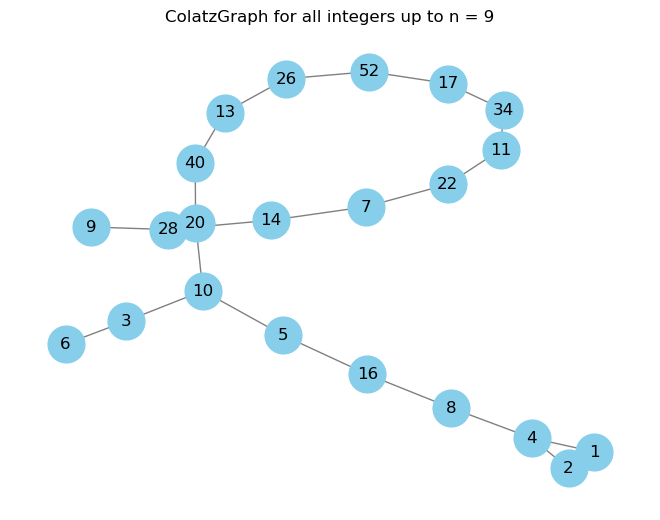

In [61]:
N = 9
colatzM = ColatzForEachN(N, 2, 2, 3, 1)
createGraphMatrix(colatzM, "basicColatzGraph")

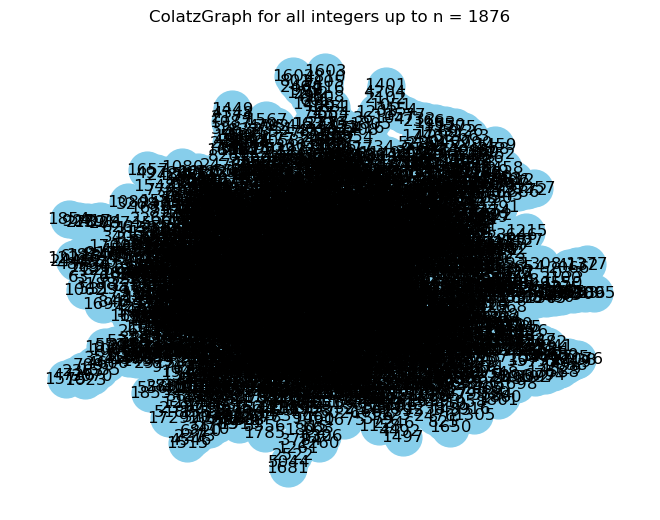

In [64]:
N = 1876
colatzM = ColatzForEachN(N, 2, 2, 3, 1)
createGraphMatrix(colatzM, "largeColatzGraph")

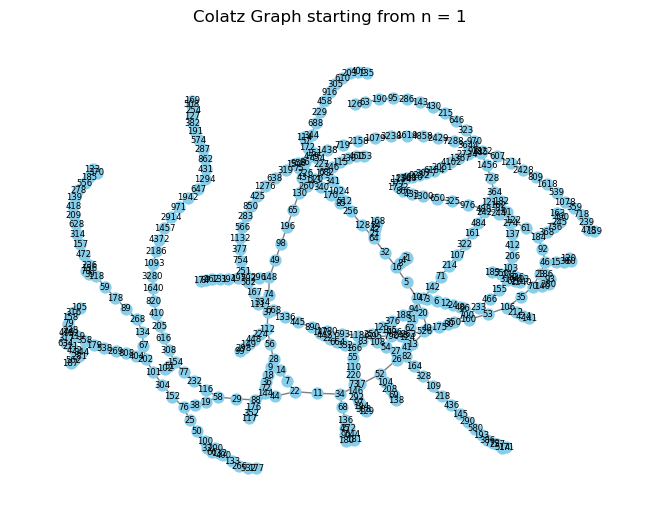

In [115]:
N = 187
colatz = ColatzForAllN(N, 2, 2, 3, 1)
# print()
createGraph(colatz, "largeColatzGraph")

# createGraph